# Implementação do Perceptron para AND, OR e XOR

Este notebook implementa o algoritmo Perceptron para resolver funções lógicas AND, OR com número variável de entradas,
e demonstra a incapacidade do Perceptron em resolver o problema XOR.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Perceptron:
    def __init__(self, n_inputs, learning_rate=0.1, epochs=1000):
        # Inicializa o perceptron com:
        # n_inputs: número de entradas (features)
        # learning_rate: taxa de aprendizado (default 0.1)
        # epochs: número de vezes que o conjunto de dados será percorrido no treinamento
        self.n_inputs = n_inputs
        self.learning_rate = learning_rate
        self.epochs = epochs
        # Inicializa os pesos com zeros, incluindo o peso do bias (por isso n_inputs + 1)
        self.weights = np.zeros(n_inputs + 1)  # Inclui o bias

    def activation(self, x):
        # Função de ativação degrau (step function)
        # Retorna 1 se a soma ponderada for >= 0, senão 0
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        # Calcula a saída do perceptron para as entradas fornecidas
        # np.dot: produto escalar entre entradas e pesos (exceto bias)
        # soma o bias (self.weights[0])
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        # Aplica a função de ativação para retornar a previsão final (0 ou 1)
        return self.activation(summation)

    def train(self, X, y):
        # Treina o perceptron com os dados de entrada X e rótulos y
        # X: matriz de entradas (cada linha é um exemplo)
        # y: vetor com as saídas desejadas (0 ou 1)
        for epoch in range(self.epochs):  # para cada época de treinamento
            for inputs, target in zip(X, y):  # para cada exemplo e seu alvo
                prediction = self.predict(inputs)  # calcula a previsão atual
                error = target - prediction       # calcula o erro
                # Ajusta os pesos (exceto bias) com base no erro e taxa de aprendizado
                self.weights[1:] += self.learning_rate * error * inputs
                # Ajusta o peso do bias da mesma forma
                self.weights[0] += self.learning_rate * error

    def plot_decision_boundary(self, X, y):
        # Plota a fronteira de decisão para visualização (apenas para 2 entradas)
        if self.n_inputs != 2:
            print("Plot disponível apenas para 2 entradas.")
            return
        # Define os limites do gráfico, com um espaçamento extra de 1
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        
        # Cria uma grade de pontos para avaliar o modelo e desenhar a fronteira
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                             np.arange(y_min, y_max, 0.1))
        
        # Para cada ponto da grade, calcula a previsão do perceptron
        Z = np.array([self.predict(np.array([x, y])) for x, y in zip(xx.ravel(), yy.ravel())])
        # Redimensiona Z para ter o formato da grade (xx.shape)
        Z = Z.reshape(xx.shape)

        # Desenha o mapa de cores com a fronteira de decisão
        plt.contourf(xx, yy, Z, alpha=0.4)
        # Plota os pontos originais, coloridos pelo rótulo y
        plt.scatter(X[:, 0], X[:, 1], c=y, marker='o')
        plt.title('Perceptron Decision Boundary')
        plt.show()


## Testando as funções AND e OR com 2 entradas

Pesos finais: [-0.2  0.2  0.1]


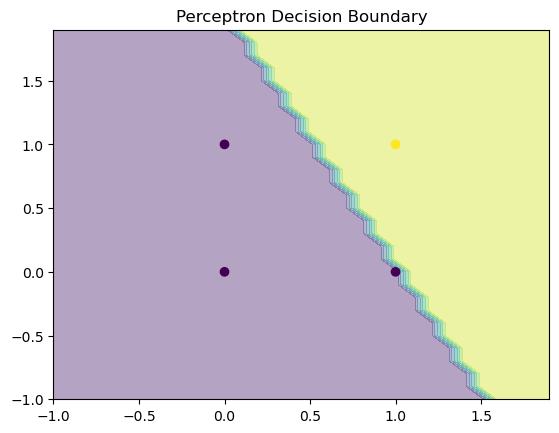

[0, 0, 0, 1]

In [3]:
# Define as entradas possíveis para a função lógica AND com 2 variáveis
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# Define as saídas desejadas para a função AND correspondente às entradas acima
y_and = np.array([0, 0, 0, 1])

# Cria uma instância do Perceptron com 2 entradas (features)
perceptron_and = Perceptron(n_inputs=2)
# Treina o perceptron usando os dados da função AND
perceptron_and.train(X_and, y_and)
# Imprime os pesos finais aprendidos pelo perceptron após o treinamento
print("Pesos finais:", perceptron_and.weights)
# Plota a fronteira de decisão que o perceptron aprendeu para separar os dados AND
perceptron_and.plot_decision_boundary(X_and, y_and)

# Faz previsões para cada entrada da função AND usando o perceptron treinado
# Retorna uma lista com as previsões (0 ou 1) para cada entrada
[perceptron_and.predict(x) for x in X_and]


## Testando a função OR com 2 entradas

Pesos finais: [-0.1  0.1  0.1]


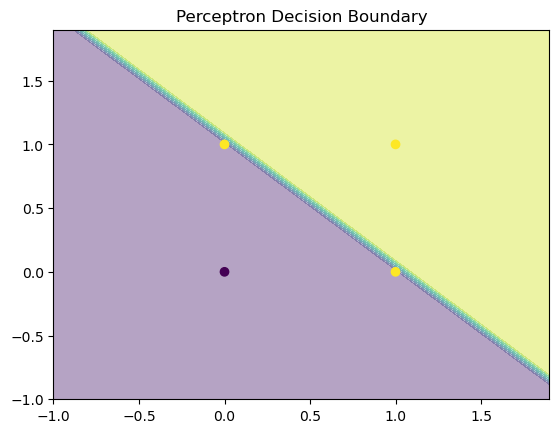

[0, 1, 1, 1]

In [4]:
# Define as entradas possíveis para a função lógica OR com 2 variáveis
X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# Define as saídas desejadas para a função OR correspondente às entradas acima
y_or = np.array([0, 1, 1, 1])

# Cria uma instância do Perceptron com 2 entradas (features)
perceptron_or = Perceptron(n_inputs=2)
# Treina o perceptron usando os dados da função OR
perceptron_or.train(X_or, y_or)
# Imprime os pesos finais aprendidos pelo perceptron após o treinamento
print("Pesos finais:", perceptron_or.weights)
# Plota a fronteira de decisão que o perceptron aprendeu para separar os dados OR
perceptron_or.plot_decision_boundary(X_or, y_or)

# Faz previsões para cada entrada da função OR usando o perceptron treinado
# Retorna uma lista com as previsões (0 ou 1) para cada entrada
[perceptron_or.predict(x) for x in X_or]


## Testando a função XOR com 2 entradas (que não é linearmente separável)

Pesos finais: [ 0.  -0.1  0. ]


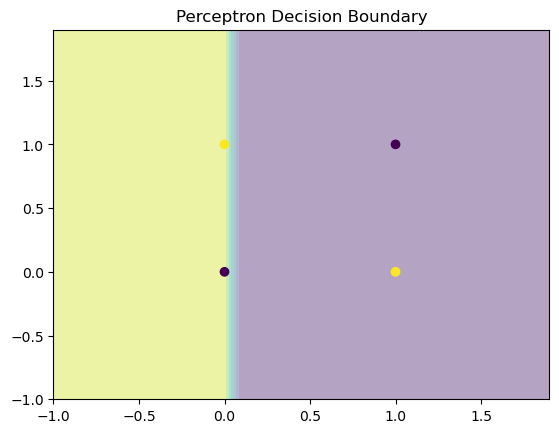

[1, 1, 0, 0]

In [5]:
# Define as entradas possíveis para a função lógica XOR com 2 variáveis
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# Define as saídas desejadas para a função XOR correspondente às entradas acima
y_xor = np.array([0, 1, 1, 0])

# Cria uma instância do Perceptron com 2 entradas (features)
perceptron_xor = Perceptron(n_inputs=2)
# Tenta treinar o perceptron usando os dados da função XOR
perceptron_xor.train(X_xor, y_xor)
# Imprime os pesos finais aprendidos pelo perceptron após o treinamento
print("Pesos finais:", perceptron_xor.weights)
# Tenta plotar a fronteira de decisão do perceptron para os dados XOR
perceptron_xor.plot_decision_boundary(X_xor, y_xor)

# Faz previsões para cada entrada da função XOR usando o perceptron treinado
# Retorna uma lista com as previsões (0 ou 1) para cada entrada
# Nota: O perceptron não consegue separar corretamente o XOR pois não é linearmente separável
[perceptron_xor.predict(x) for x in X_xor]


## Testando AND e OR com mais entradas (10 entradas)

In [6]:
def test_high_dimensional_perceptron():
    # Testa o perceptron com função AND de 10 entradas
    
    # Gera uma matriz 1024x10 com valores aleatórios 0 ou 1 para as entradas
    X_and_10 = np.random.randint(0, 2, (1024, 10))
    # Para cada linha, verifica se todos os valores são 1 (AND lógico)
    y_and_10 = np.all(X_and_10 == 1, axis=1).astype(int)

    # Cria o perceptron para 10 entradas
    perceptron_and_10 = Perceptron(n_inputs=10)
    # Treina o perceptron com os dados AND de 10 entradas
    perceptron_and_10.train(X_and_10, y_and_10)
    # Faz as previsões para todas as entradas geradas
    predictions_and = np.array([perceptron_and_10.predict(x) for x in X_and_10])
    
    # Imprime as primeiras 10 entradas com saída esperada e prevista
    print("AND 10 entradas - primeiras 10 amostras:")
    for i in range(10):
        print(f"Entrada: {X_and_10[i]}, Esperado: {y_and_10[i]}, Previsto: {predictions_and[i]}")
    
    # Calcula e imprime a acurácia do perceptron no problema AND
    print("AND 10 entradas - Accuracy:", np.mean(predictions_and == y_and_10))
    print()

    # Testa o perceptron com função OR de 10 entradas
    
    # Gera uma matriz 1024x10 com valores aleatórios 0 ou 1 para as entradas
    X_or_10 = np.random.randint(0, 2, (1024, 10))
    # Para cada linha, verifica se há pelo menos um valor 1 (OR lógico)
    y_or_10 = np.any(X_or_10 == 1, axis=1).astype(int)

    # Cria o perceptron para 10 entradas
    perceptron_or_10 = Perceptron(n_inputs=10)
    # Treina o perceptron com os dados OR de 10 entradas
    perceptron_or_10.train(X_or_10, y_or_10)
    # Faz as previsões para todas as entradas geradas
    predictions_or = np.array([perceptron_or_10.predict(x) for x in X_or_10])
    
    # Imprime as primeiras 10 entradas com saída esperada e prevista
    print("OR 10 entradas - primeiras 10 amostras:")
    for i in range(10):
        print(f"Entrada: {X_or_10[i]}, Esperado: {y_or_10[i]}, Previsto: {predictions_or[i]}")
    
    # Calcula e imprime a acurácia do perceptron no problema OR
    print("OR 10 entradas - Accuracy:", np.mean(predictions_or == y_or_10))

# Executa o teste para funções AND e OR com 10 entradas
test_high_dimensional_perceptron()


AND 10 entradas - primeiras 10 amostras:
Entrada: [0 0 0 1 1 0 0 0 1 0], Esperado: 0, Previsto: 0
Entrada: [0 0 1 1 1 1 1 0 1 1], Esperado: 0, Previsto: 0
Entrada: [0 0 1 1 1 1 1 1 1 1], Esperado: 0, Previsto: 0
Entrada: [1 0 0 1 0 1 1 0 0 0], Esperado: 0, Previsto: 0
Entrada: [1 0 1 0 0 1 0 0 1 0], Esperado: 0, Previsto: 0
Entrada: [0 0 1 1 1 0 0 1 1 0], Esperado: 0, Previsto: 0
Entrada: [0 1 0 0 0 1 0 1 1 0], Esperado: 0, Previsto: 0
Entrada: [0 0 1 0 1 1 0 0 0 1], Esperado: 0, Previsto: 0
Entrada: [0 0 0 1 0 1 0 0 0 1], Esperado: 0, Previsto: 0
Entrada: [1 0 1 0 0 1 1 0 0 0], Esperado: 0, Previsto: 0
AND 10 entradas - Accuracy: 1.0

OR 10 entradas - primeiras 10 amostras:
Entrada: [1 0 0 0 0 0 1 1 1 0], Esperado: 1, Previsto: 1
Entrada: [0 0 1 0 1 1 0 1 1 0], Esperado: 1, Previsto: 1
Entrada: [0 1 1 1 0 1 0 0 0 1], Esperado: 1, Previsto: 1
Entrada: [1 1 1 1 1 0 1 0 1 1], Esperado: 1, Previsto: 1
Entrada: [0 0 0 1 0 0 1 0 0 0], Esperado: 1, Previsto: 1
Entrada: [0 0 1 0 0 1 1 1 1 0],